In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [4]:
model_path = 'smartagrotech.keras'
test_dir = 'tomato_new'  
img_height, img_width = 224, 224

In [5]:
model = tf.keras.models.load_model(model_path)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,  # Use batch size 1 for prediction
    class_mode='categorical',
    shuffle=False
)

Found 11000 images belonging to 10 classes.


In [7]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

11000/11000 [==============================] - 231s 21ms/step


In [8]:
y_true = test_generator.classes

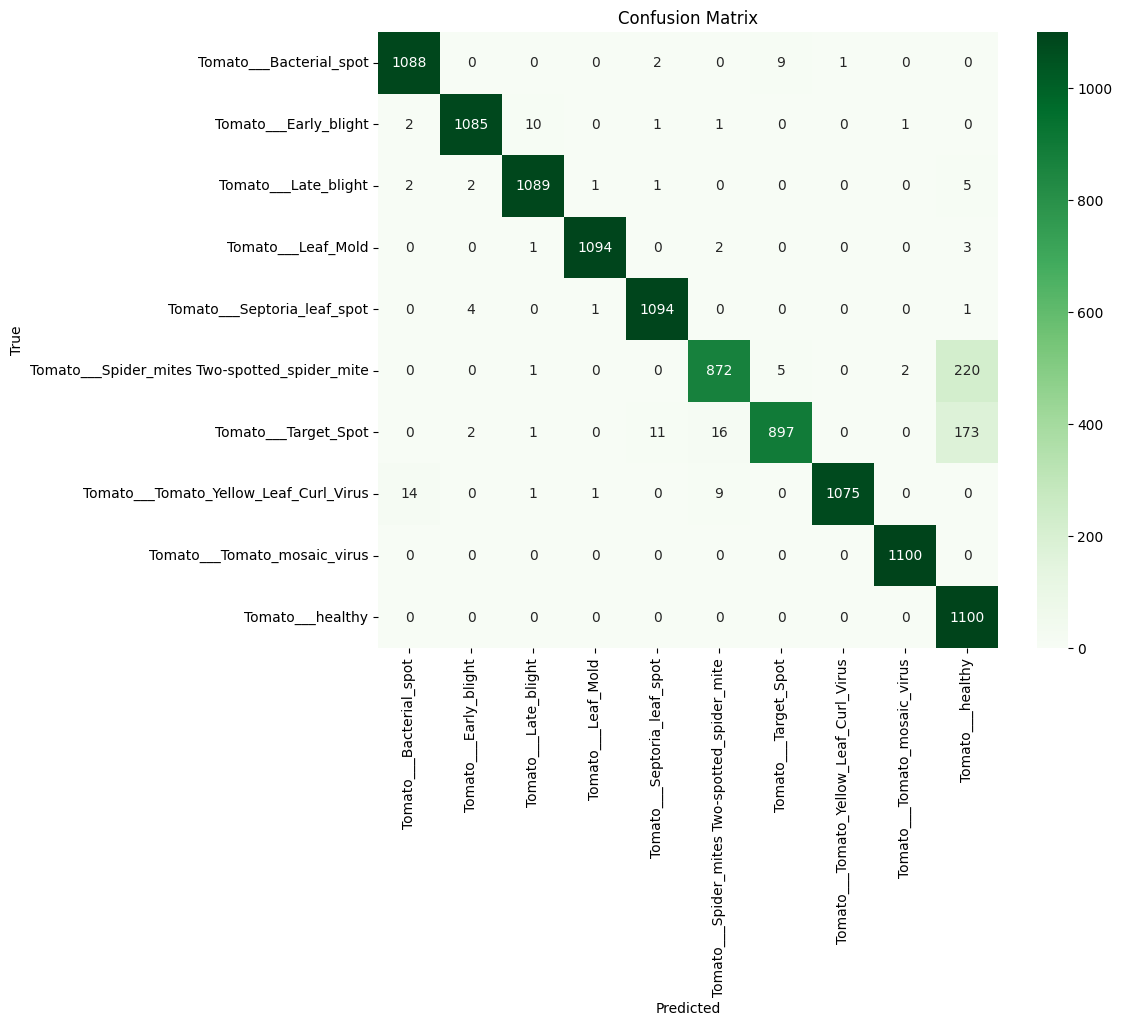

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

Classification Report:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.99      0.99      1100
                        Tomato___Early_blight       0.99      0.99      0.99      1100
                         Tomato___Late_blight       0.99      0.99      0.99      1100
                           Tomato___Leaf_Mold       1.00      0.99      1.00      1100
                  Tomato___Septoria_leaf_spot       0.99      0.99      0.99      1100
Tomato___Spider_mites Two-spotted_spider_mite       0.97      0.79      0.87      1100
                         Tomato___Target_Spot       0.98      0.82      0.89      1100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.98      0.99      1100
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00      1100
                             Tomato___healthy       0.73      1.00      0.85      1100

                 

In [13]:
y_true_bin = label_binarize(y_true, classes=range(len(test_generator.class_indices)))
y_pred_bin = y_pred

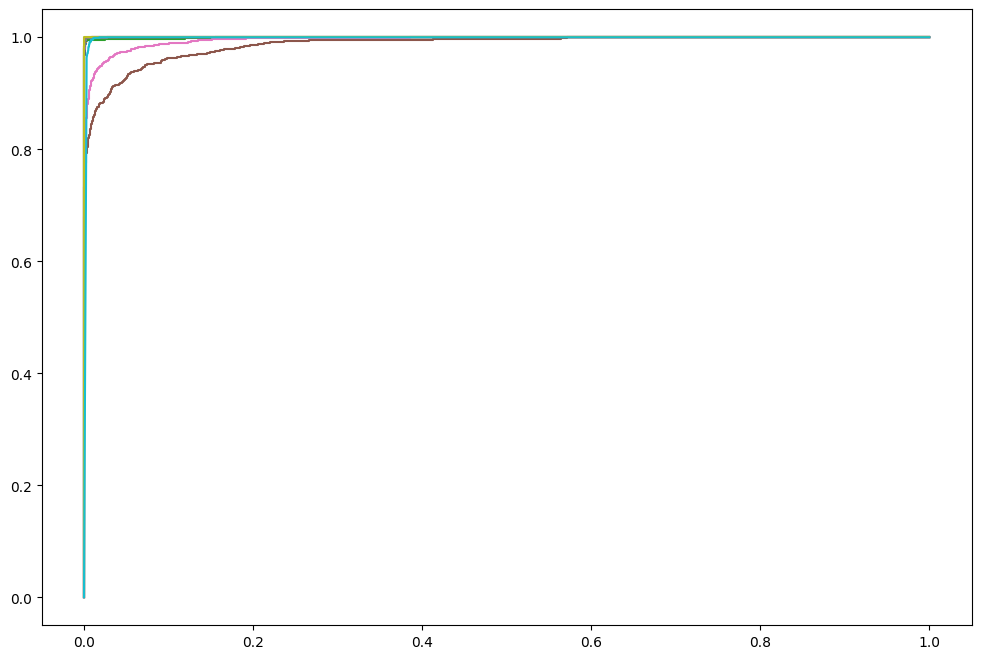

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))
for i in range(y_true_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

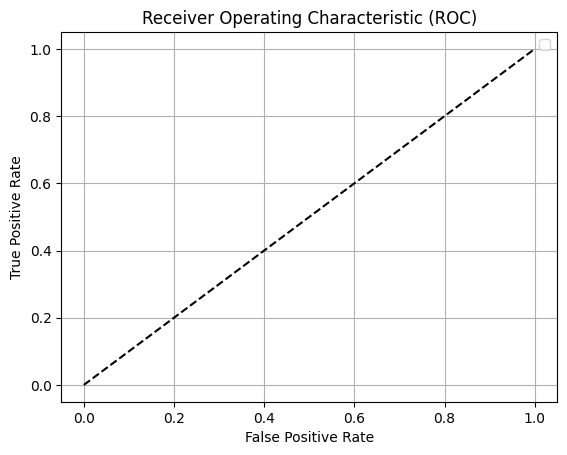

In [15]:
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

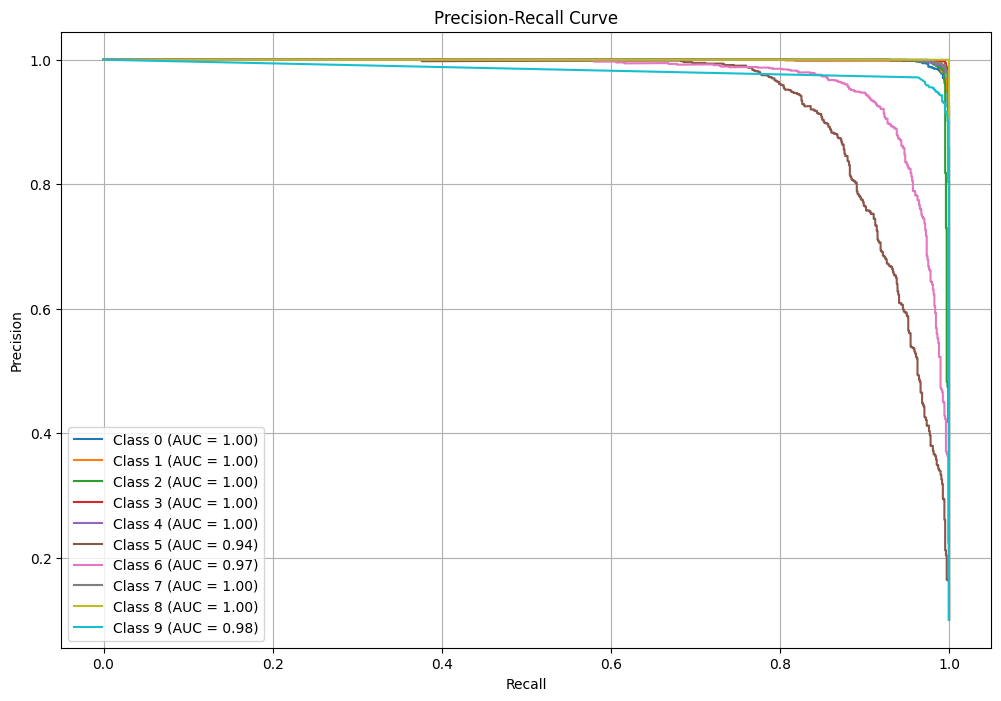

In [16]:
precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(12, 8))
for i in range(y_true_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:0.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()